# Understanding Swing State Party Affiliation: The Equity Impact

Our goal is to assess equity's impact on a voter's Political Party Affiliation and whether there is a significant difference for voters in swing states and non-swing states. By doing so, we will be able to predict whether a new voter will align with the state's majority Political Party based on their demographic information, equity, and their state's swing-state status.

**Changes to our Proposed Plan**

Our initial proposal sought to predict voter turnout in key swing states by considering a voter’s equity. This was difficult to assess since the voter files only contains data on people who vote; The files do not contain information on potential voters who did not vote. The dataset does, however, contain enough information to assess equity alongside other demographic information to evaluate the equity impact on political affiliation across swing and non-swing states.

Additionally, we assessed whether it was necessary to determine the exact political party of an individual, but we determined it was more important to predict if the new voter would would align with the state's majority party or not.

**In This Report**

In this report, we continue our analysis on our prior report's introductory Exploratory Data Analysis. After our learnings from the prior report, we've decided to remove certain columns that didn't provide enough value to help solve the problem, and we've conducted several Machine Learning models with various parameter options to determine the optimal model for voter political affiliation prediction.

**Why we chose to focus on Equity**

Equity comes in numerous forms, be it Income, Net Worth, Living Situation, Home Value, extra savings to donate, education, even where you live! With political discourse on the rise in such sharp contrast, our team wanted to explore whether equity is a strong enough indicator of a voter's political party alignment. While we know there are people all along the equity spectrum within each party, it begs the question: Does equity have any impact?

### Table of Contents

* [The Datasets](#theDatasets)
    * [Columns](#columns)
    * [Import Packages / Libraries](#imports)
    * [Define Schema](#defineSchema)
* [Load Dataset](#loadDataset)
    * [Selected Columns](#selectedColumns)
    * [Caching](#caching)
* [Data Cleanup](#dataCleanup)
    * [Typical Voter Profile](#typicalVoterProfile)
    * [Duplicate & Null Check](#duplicateCheck)
* [Leveling Out the Data: Undersampling](#undersampling)
* [Initial Questions & Insights](#initialQuestions)
* [Aggregate Analysis](#aggregateAnalysis)
* [Feature Engineering](#featureEngineering)
* [Correlation Analysis](#correlation)
* [Machine Learning](#machineLearning)
    * [Logistic Regression](#lr)
    * [Random Forest](#rf)
    * [Decision Tree](#dt)
    * [Gradient Boosted Trees](#gbt)
    * [Final Scores](#final)
* [Conclusion](#conclusion)

## The Datasets <a class="anchor" id="theDatasets"></a>

We obtained the State Voter File Datasets from the Center for Antiracist Research (CAR) at Boston University. Each voter file contains records for every registered voter within a particular state. Each file contains geographic, demographic and household information related to each voter. In order to properly investigate our prompt, we discussed which columns were necessary to do our initial exploration. Out of 726 columns, below are the 41 most important columns to help us explore our overarching question.

#### Columns <a class="anchor" id="columns"></a>

|Column Name|Renamed|Description|Purpose|Type|
|--|--|--|--|--|
|LALVOTERID|voter_id|Permanent and unique ID generated by L2 for a single voter|Identifier|String|
|Voters_Active|status|Voters_Active|Grouping|String|
|Residence_Addresses_City|res_city||Location|String|
|Residence_Addresses_Zip|res_zip||Location|Integer|
|Residence_Families_HHCount|hh_count|Total number of voters residing at the given residence address, 1 thru 10|Demographic|Integer|
|Residence_HHGender_Description|hh_gender_desc|Cannot Determine,Female Only Household,Male Only Household,Mixed Gender Household|Demographic|String|
|Voters_Gender|gender|M"|Demographic|String|
|Voters_Age|age|Age is based on current year minus year of birth.|Demographic|Integer|
|Parties_Description|party|Full name of official party. See Parties tab.|Target|String|
|Ethnic_Description|ethnic|one of approximately 100 ethnic categories covering about 90% of voters with the remaining voters classifed as unknown". See Ethnic tab."|Demographic|String|
|EthnicGroups_EthnicGroup1Desc|ethnic_group||Demographic|String|
|Religions_Description|religion|Modeled data based on first name, last name and census data. Possible values: Jewish, Catholic, Protestant, Mormon, Islamic, Buddhist, Hindu, Shinto, Sikh, Lutheran, Eastern Orthodox, Greek Orthodox, Christian|Demographic|String|
|County|county|District|Location|String|
|CommercialData_ComputerOwnerInHome|computer_owner|Yes or unknown|Demographic|String|
|CommercialData_DonatesToCharityInHome|donates|Yes or unknown|Demographic|String|
|CommercialData_Education|edu_level|Based on modeled and self-reported data. Possible values are: Unknown, HS Diploma - Extremely Likely, Some College -Extremely Likely, Bach Degree - Extremely Likely, Grad Degree - Extremely Likely, Less than HS Diploma - Ex Like, HS Diploma - Likely, Some College - Likely, Bach Degree - Likely, Grad Degree - Likely, Less than HS Diploma - Likely|Demographic|String|
|CommercialData_EstimatedHHIncome|hh_income_grouping||Equity|String|
|CommercialData_EstimatedHHIncomeAmount|hh_income_amount||Equity|String|
|CommercialData_EstimatedAreaMedianHHIncome|area_hh_income||Equity|String|
|CommercialData_ISPSA|ispsa_group|Index of Social Position for Small Areas" is a mix of education and income information to suggest where a voter lies on a scale of 0 to 9 on the "social-economic ladder"."|Demographic|Integer|
|CommercialData_AreaMedianEducationYears|area_edu_years||Demographic|Integer|
|CommercialData_AreaMedianHousingValue|area_house_value||Equity|String|
|CommercialData_PoliticalContributerInHome|hh_political_contributor|Single digit number of contributions made to political causes by members of this household|Equity|Integer|
|CommercialData_PropertyType|property_type|Agricultural, Apartment, Commercial Condo, Condominium, Duplex, Mobil Home, Residential, Unknown|Demographic|String|
|CommercialDataLL_Business_Owner|business_owner|Yes/null|Equity|String|
|CommercialDataLL_Home_Owner_Or_Renter|owner_renter|Likely Homeowner/Likely Renter/null|Equity|String|
|CommercialDataLL_Investor|investor|Yes/null|Equity|String|
|CommercialDataLL_HH_Net_Worth|hh_net_worth_grouping||Equity|String|
|CommercialDataLL_PetOwner_Horse|horse_owner|Yes/null|Equity|String|
|Residence_Addresses_Latitude|res_lat||Location|Double|
|Residence_Addresses_Longitude|res_lon||Location|Double|
|CommercialData_DwellingUnitSize|unit_size|Single Family Dwelling Unit, Duplex, Triplex, 4, 5-9, 10-19, 20-49, 50-100, 101+|Demographic|String|
|CommercialData_EstHomeValue|house_value|Modeled commercial data|Equity|String|
|CommercialData_HomePurchasePrice|house_price|Commercial data|Equity|String|
|CommercialData_PresenceOfPremCredCrdInHome|prem_cc_owner|Yes or unknown|Equity|String|
|CommercialData_StateIncomeDecile|income_decile|Census Data descriptive field identifying the decile range of state income for the area in which the voter lives. 0 thru 9, with 9 being highest.|Equity|Integer|
|CommercialDataLL_Donates_to_Conservative_Causes|don_conservative|Yes/null|Equity|String|
|CommercialDataLL_Donates_to_Healthcare|don_healthcare|Yes/null|Equity|String|
|CommercialDataLL_Donates_to_Liberal_Causes|don_liberal|Yes/null|Equity|String|
|CommercialDataLL_Donates_to_Veterans_Causes|don_veteran|Yes/null|Equity|String|
|CommercialDataLL_Home_Office|home_office|Yes/null|Equity|String|

#### Import Packages / Libraries <a class="anchor" id="imports"></a>

In [59]:
import pandas as pd
import numpy as np
from pyspark.sql.types import StructField, StructType, BooleanType, DoubleType, IntegerType, StringType, LongType
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns
import pyspark.sql.functions as F

#### Define Schema <a class="anchor" id="defineSchema"></a>

In [3]:
VoterSchema = StructType([
 StructField('SEQUENCE',IntegerType(), True),
 StructField('LALVOTERID',StringType(), True),
 StructField('Voters_Active',StringType(), True),
 StructField('Voters_StateVoterID',IntegerType(), True),
 StructField('Voters_CountyVoterID',StringType(), True),
 StructField('VoterTelephones_LandlineAreaCode',IntegerType(), True),
 StructField('VoterTelephones_Landline7Digit',StringType(), True),
 StructField('VoterTelephones_LandlineFormatted',StringType(), True),
 StructField('VoterTelephones_LandlineUnformatted',LongType(), True),
 StructField('VoterTelephones_LandlineConfidenceCode',IntegerType(), True),
 StructField('VoterTelephones_CellPhoneOnly',BooleanType(), True),
 StructField('VoterTelephones_CellPhoneFormatted',StringType(), True),
 StructField('VoterTelephones_CellPhoneUnformatted',LongType(), True),
 StructField('VoterTelephones_CellConfidenceCode',IntegerType(), True),
 StructField('Voters_FirstName',StringType(), True),
 StructField('Voters_MiddleName',StringType(), True),
 StructField('Voters_LastName',StringType(), True),
 StructField('Voters_NameSuffix',StringType(), True),
 StructField('Residence_Addresses_AddressLine',StringType(), True),
 StructField('Residence_Addresses_ExtraAddressLine',StringType(), True),
 StructField('Residence_Addresses_City',StringType(), True),
 StructField('Residence_Addresses_State',StringType(), True),
 StructField('Residence_Addresses_Zip',IntegerType(), True),
 StructField('Residence_Addresses_ZipPlus4',IntegerType(), True),
 StructField('Residence_Addresses_HouseNumber',StringType(), True),
 StructField('Residence_Addresses_PrefixDirection',StringType(), True),
 StructField('Residence_Addresses_StreetName',StringType(), True),
 StructField('Residence_Addresses_Designator',StringType(), True),
 StructField('Residence_Addresses_SuffixDirection',StringType(), True),
 StructField('Residence_Addresses_ApartmentNum',StringType(), True),
 StructField('Residence_Addresses_ApartmentType',StringType(), True),
 StructField('Residence_Addresses_CassErrStatCode',StringType(), True),
 StructField('Voters_SequenceZigZag',IntegerType(), True),
 StructField('Voters_SequenceOddEven',IntegerType(), True),
 StructField('Residence_Addresses_CensusTract',IntegerType(), True),
 StructField('Residence_Addresses_CensusBlockGroup',IntegerType(), True),
 StructField('Residence_Addresses_CensusBlock',IntegerType(), True),
 StructField('Residence_Addresses_Latitude',DoubleType(), True),
 StructField('Residence_Addresses_Longitude',DoubleType(), True),
 StructField('Residence_Addresses_LatLongAccuracy',StringType(), True),
 StructField('Residence_Addresses_Property_LandSq_Footage',IntegerType(), True),
 StructField('Residence_Addresses_Property_HomeSq_Footage',IntegerType(), True),
 StructField('Residence_Addresses_Density',IntegerType(), True),
 StructField('Residence_Families_FamilyID',StringType(), True),
 StructField('Residence_Families_HHCount',IntegerType(), True),
 StructField('Residence_HHGender_Description',StringType(), True),
 StructField('Residence_HHParties_Description',StringType(), True),
 StructField('Mailing_Addresses_AddressLine',StringType(), True),
 StructField('Mailing_Addresses_ExtraAddressLine',StringType(), True),
 StructField('Mailing_Addresses_City',StringType(), True),
 StructField('Mailing_Addresses_State',StringType(), True),
 StructField('Mailing_Addresses_Zip',IntegerType(), True),
 StructField('Mailing_Addresses_ZipPlus4',IntegerType(), True),
 StructField('Mailing_Addresses_HouseNumber',StringType(), True),
 StructField('Mailing_Addresses_PrefixDirection',StringType(), True),
 StructField('Mailing_Addresses_StreetName',StringType(), True),
 StructField('Mailing_Addresses_Designator',StringType(), True),
 StructField('Mailing_Addresses_SuffixDirection',StringType(), True),
 StructField('Mailing_Addresses_ApartmentNum',StringType(), True),
 StructField('Mailing_Addresses_ApartmentType',StringType(), True),
 StructField('Mailing_Addresses_CassErrStatCode',StringType(), True),
 StructField('Mailing_Families_FamilyID',StringType(), True),
 StructField('Mailing_Families_HHCount',IntegerType(), True),
 StructField('Mailing_HHGender_Description',StringType(), True),
 StructField('Mailing_HHParties_Description',StringType(), True),
 StructField('Voters_Gender',StringType(), True),
 StructField('Voters_Age',IntegerType(), True),
 StructField('Voters_BirthDate',StringType(), True),
 StructField('DateConfidence_Description',StringType(), True),
 StructField('Parties_Description',StringType(), True),
 StructField('VoterParties_Change_Changed_Party',StringType(), True),
 StructField('Ethnic_Description',StringType(), True),
 StructField('EthnicGroups_EthnicGroup1Desc',StringType(), True),
 StructField('CountyEthnic_LALEthnicCode',StringType(), True),
 StructField('CountyEthnic_Description',StringType(), True),
 StructField('Religions_Description',StringType(), True),
 StructField('Voters_CalculatedRegDate',StringType(), True),
 StructField('Voters_OfficialRegDate',StringType(), True),
 StructField('Voters_PlaceOfBirth',StringType(), True),
 StructField('Languages_Description',StringType(), True),
 StructField('AbsenteeTypes_Description',StringType(), True),
 StructField('MilitaryStatus_Description',StringType(), True),
 StructField('MaritalStatus_Description',StringType(), True),
 StructField('US_Congressional_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_CD',StringType(), True),
 StructField('State_Senate_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_SD',StringType(), True),
 StructField('State_House_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_HD',StringType(), True),
 StructField('State_Legislative_District',StringType(), True),
 StructField('AddressDistricts_Change_Changed_LD',StringType(), True),
 StructField('2001_US_Congressional_District',StringType(), True),
 StructField('2001_State_Senate_District',IntegerType(), True),
 StructField('2001_State_House_District',IntegerType(), True),
 StructField('2001_State_Legislative_District',StringType(), True),
 StructField('County',StringType(), True),
 StructField('Voters_FIPS',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_County',StringType(), True),
 StructField('Precinct',StringType(), True),
 StructField('County_Commissioner_District',StringType(), True),
 StructField('County_Supervisorial_District',StringType(), True),
 StructField('County_Legislative_District',StringType(), True),
 StructField('City',StringType(), True),
 StructField('City_Council_Commissioner_District',StringType(), True),
 StructField('City_Ward',StringType(), True),
 StructField('City_Mayoral_District',StringType(), True),
 StructField('Town_District',StringType(), True),
 StructField('Town_Ward',StringType(), True),
 StructField('Town_Council',StringType(), True),
 StructField('Village',StringType(), True),
 StructField('Village_Ward',StringType(), True),
 StructField('Township',StringType(), True),
 StructField('Township_Ward',StringType(), True),
 StructField('Borough',StringType(), True),
 StructField('Borough_Ward',StringType(), True),
 StructField('Hamlet_Community_Area',StringType(), True),
 StructField('4H_Livestock_District',StringType(), True),
 StructField('Airport_District',StringType(), True),
 StructField('Annexation_District',StringType(), True),
 StructField('Aquatic_Center_District',StringType(), True),
 StructField('Aquatic_District',StringType(), True),
 StructField('Assessment_District',StringType(), True),
 StructField('Bay_Area_Rapid_Transit',StringType(), True),
 StructField('Board_of_Education_District',StringType(), True),
 StructField('Board_of_Education_SubDistrict',StringType(), True),
 StructField('Bonds_District',StringType(), True),
 StructField('Career_Center',StringType(), True),
 StructField('Cemetery_District',StringType(), True),
 StructField('Central_Committee_District',StringType(), True),
 StructField('Chemical_Control_District',StringType(), True),
 StructField('City_School_District',StringType(), True),
 StructField('Coast_Water_District',StringType(), True),
 StructField('College_Board_District',StringType(), True),
 StructField('Committee_Super_District',StringType(), True),
 StructField('Communications_District',StringType(), True),
 StructField('Community_College',StringType(), True),
 StructField('Community_College_Commissioner_District',StringType(), True),
 StructField('Community_College_SubDistrict',StringType(), True),
 StructField('Community_College_At_Large',StringType(), True),
 StructField('Community_Council_District',StringType(), True),
 StructField('Community_Council_SubDistrict',StringType(), True),
 StructField('Community_Facilities_District',StringType(), True),
 StructField('Community_Facilities_SubDistrict',StringType(), True),
 StructField('Community_Hospital_District',StringType(), True),
 StructField('Community_Planning_Area',StringType(), True),
 StructField('Community_Service_District',StringType(), True),
 StructField('Community_Service_SubDistrict',StringType(), True),
 StructField('Congressional_Township',StringType(), True),
 StructField('Conservation_District',StringType(), True),
 StructField('Conservation_SubDistrict',StringType(), True),
 StructField('Consolidated_Water_District',StringType(), True),
 StructField('Control_Zone_District',StringType(), True),
 StructField('Corrections_District',StringType(), True),
 StructField('County_Board_of_Education_District',StringType(), True),
 StructField('County_Board_of_Education_SubDistrict',StringType(), True),
 StructField('County_Community_College_District',StringType(), True),
 StructField('County_Fire_District',StringType(), True),
 StructField('County_Hospital_District',StringType(), True),
 StructField('County_Library_District',StringType(), True),
 StructField('County_Memorial_District',StringType(), True),
 StructField('County_Paramedic_District',StringType(), True),
 StructField('County_Service_Area',StringType(), True),
 StructField('County_Service_Area_SubDistrict',StringType(), True),
 StructField('County_Sewer_District',StringType(), True),
 StructField('County_Superintendent_of_Schools_District',StringType(), True),
 StructField('County_Unified_School_District',StringType(), True),
 StructField('County_Water_District',StringType(), True),
 StructField('County_Water_Landowner_District',StringType(), True),
 StructField('County_Water_SubDistrict',StringType(), True),
 StructField('Democratic_Convention_Member',StringType(), True),
 StructField('Democratic_Zone',StringType(), True),
 StructField('Designated_Market_Area_DMA',StringType(), True),
 StructField('District_Attorney',StringType(), True),
 StructField('Drainage_District',StringType(), True),
 StructField('Education_Commission_District',StringType(), True),
 StructField('Educational_Service_District',StringType(), True),
 StructField('Educational_Service_Subdistrict',StringType(), True),
 StructField('Election_Commissioner_District',StringType(), True),
 StructField('Elementary_School_District',StringType(), True),
 StructField('Elementary_School_SubDistrict',StringType(), True),
 StructField('Emergency_Communication_911_District',StringType(), True),
 StructField('Emergency_Communication_911_SubDistrict',StringType(), True),
 StructField('Enterprise_Zone_District',StringType(), True),
 StructField('Exempted_Village_School_District',StringType(), True),
 StructField('EXT_District',StringType(), True),
 StructField('Facilities_Improvement_District',StringType(), True),
 StructField('Fire_District',StringType(), True),
 StructField('Fire_Maintenance_District',StringType(), True),
 StructField('Fire_Protection_District',StringType(), True),
 StructField('Fire_Protection_SubDistrict',StringType(), True),
 StructField('Fire_Protection_Tax_Measure_District',StringType(), True),
 StructField('Fire_Service_Area_District',StringType(), True),
 StructField('Fire_SubDistrict',StringType(), True),
 StructField('Flood_Control_Zone',StringType(), True),
 StructField('Forest_Preserve',StringType(), True),
 StructField('Garbage_District',StringType(), True),
 StructField('Geological_Hazard_Abatement_District',StringType(), True),
 StructField('Health_District',StringType(), True),
 StructField('High_School_District',StringType(), True),
 StructField('High_School_SubDistrict',StringType(), True),
 StructField('Hospital_District',StringType(), True),
 StructField('Hospital_SubDistrict',StringType(), True),
 StructField('Improvement_Landowner_District',StringType(), True),
 StructField('Independent_Fire_District',StringType(), True),
 StructField('Irrigation_District',StringType(), True),
 StructField('Irrigation_SubDistrict',StringType(), True),
 StructField('Island',StringType(), True),
 StructField('Judicial_Appellate_District',StringType(), True),
 StructField('Judicial_Chancery_Court',StringType(), True),
 StructField('Judicial_Circuit_Court_District',StringType(), True),
 StructField('Judicial_County_Board_of_Review_District',StringType(), True),
 StructField('Judicial_County_Court_District',StringType(), True),
 StructField('Judicial_District',StringType(), True),
 StructField('Judicial_District_Court_District',StringType(), True),
 StructField('Judicial_Family_Court_District',StringType(), True),
 StructField('Judicial_Jury_District',StringType(), True),
 StructField('Judicial_Juvenile_Court_District',StringType(), True),
 StructField('Judicial_Magistrate_Division',StringType(), True),
 StructField('Judicial_Sub_Circuit_District',StringType(), True),
 StructField('Judicial_Superior_Court_District',StringType(), True),
 StructField('Judicial_Supreme_Court_District',StringType(), True),
 StructField('Justice_of_the_Peace',StringType(), True),
 StructField('Land_Commission',StringType(), True),
 StructField('Landscaping_And_Lighting_Assessment_Distric',StringType(), True),
 StructField('Law_Enforcement_District',StringType(), True),
 StructField('Learning_Community_Coordinating_Council_District',StringType(), True),
 StructField('Levee_District',StringType(), True),
 StructField('Levee_Reconstruction_Assesment_District',StringType(), True),
 StructField('Library_District',StringType(), True),
 StructField('Library_Services_District',StringType(), True),
 StructField('Library_SubDistrict',StringType(), True),
 StructField('Lighting_District',StringType(), True),
 StructField('Local_Hospital_District',StringType(), True),
 StructField('Local_Park_District',StringType(), True),
 StructField('Maintenance_District',StringType(), True),
 StructField('Master_Plan_District',StringType(), True),
 StructField('Memorial_District',StringType(), True),
 StructField('Metro_Service_District',StringType(), True),
 StructField('Metro_Service_Subdistrict',StringType(), True),
 StructField('Metro_Transit_District',StringType(), True),
 StructField('Metropolitan_Water_District',StringType(), True),
 StructField('Middle_School_District',StringType(), True),
 StructField('Mosquito_Abatement_District',StringType(), True),
 StructField('Mountain_Water_District',StringType(), True),
 StructField('Multi_township_Assessor',StringType(), True),
 StructField('Municipal_Advisory_Council_District',StringType(), True),
 StructField('Municipal_Court_District',StringType(), True),
 StructField('Municipal_Utility_District',StringType(), True),
 StructField('Municipal_Utility_SubDistrict',StringType(), True),
 StructField('Municipal_Water_District',StringType(), True),
 StructField('Municipal_Water_SubDistrict',StringType(), True),
 StructField('Museum_District',StringType(), True),
 StructField('Northeast_Soil_and_Water_District',StringType(), True),
 StructField('Open_Space_District',StringType(), True),
 StructField('Open_Space_SubDistrict',StringType(), True),
 StructField('Other',StringType(), True),
 StructField('Paramedic_District',StringType(), True),
 StructField('Park_Commissioner_District',StringType(), True),
 StructField('Park_District',StringType(), True),
 StructField('Park_SubDistrict',StringType(), True),
 StructField('Planning_Area_District',StringType(), True),
 StructField('Police_District',StringType(), True),
 StructField('Port_District',StringType(), True),
 StructField('Port_SubDistrict',StringType(), True),
 StructField('Power_District',StringType(), True),
 StructField('Proposed_City',StringType(), True),
 StructField('Proposed_City_Commissioner_District',StringType(), True),
 StructField('Proposed_Community_College',StringType(), True),
 StructField('Proposed_District',StringType(), True),
 StructField('Proposed_Elementary_School_District',StringType(), True),
 StructField('Proposed_Fire_District',StringType(), True),
 StructField('Proposed_Unified_School_District',StringType(), True),
 StructField('Public_Airport_District',StringType(), True),
 StructField('Public_Regulation_Commission',StringType(), True),
 StructField('Public_Service_Commission_District',StringType(), True),
 StructField('Public_Utility_District',StringType(), True),
 StructField('Public_Utility_SubDistrict',StringType(), True),
 StructField('Rapid_Transit_District',StringType(), True),
 StructField('Rapid_Transit_SubDistrict',StringType(), True),
 StructField('Reclamation_District',StringType(), True),
 StructField('Recreation_District',StringType(), True),
 StructField('Recreational_SubDistrict',StringType(), True),
 StructField('Regional_Office_of_Education_District',StringType(), True),
 StructField('Republican_Area',StringType(), True),
 StructField('Republican_Convention_Member',StringType(), True),
 StructField('Resort_Improvement_District',StringType(), True),
 StructField('Resource_Conservation_District',StringType(), True),
 StructField('River_Water_District',StringType(), True),
 StructField('Road_Maintenance_District',StringType(), True),
 StructField('Rural_Service_District',StringType(), True),
 StructField('Sanitary_District',StringType(), True),
 StructField('Sanitary_SubDistrict',StringType(), True),
 StructField('School_Board_District',StringType(), True),
 StructField('School_District',StringType(), True),
 StructField('School_District_Vocational',StringType(), True),
 StructField('School_Facilities_Improvement_District',StringType(), True),
 StructField('School_Subdistrict',StringType(), True),
 StructField('Service_Area_District',StringType(), True),
 StructField('Sewer_District',StringType(), True),
 StructField('Sewer_Maintenance_District',StringType(), True),
 StructField('Sewer_SubDistrict',StringType(), True),
 StructField('Snow_Removal_District',StringType(), True),
 StructField('Soil_And_Water_District',StringType(), True),
 StructField('Soil_And_Water_District_At_Large',StringType(), True),
 StructField('Special_Reporting_District',StringType(), True),
 StructField('Special_Tax_District',StringType(), True),
 StructField('State_Board_of_Equalization',StringType(), True),
 StructField('Storm_Water_District',StringType(), True),
 StructField('Street_Lighting_District',StringType(), True),
 StructField('Superintendent_of_Schools_District',StringType(), True),
 StructField('Transit_District',StringType(), True),
 StructField('Transit_SubDistrict',StringType(), True),
 StructField('TriCity_Service_District',StringType(), True),
 StructField('TV_Translator_District',StringType(), True),
 StructField('Unified_School_District',StringType(), True),
 StructField('Unified_School_SubDistrict',StringType(), True),
 StructField('Unincorporated_District',StringType(), True),
 StructField('Unincorporated_Park_District',StringType(), True),
 StructField('Unprotected_Fire_District',StringType(), True),
 StructField('Ute_Creek_Soil_District',StringType(), True),
 StructField('Vector_Control_District',StringType(), True),
 StructField('Vote_By_Mail_Area',StringType(), True),
 StructField('Wastewater_District',StringType(), True),
 StructField('Water_Agency',StringType(), True),
 StructField('Water_Agency_SubDistrict',StringType(), True),
 StructField('Water_Conservation_District',StringType(), True),
 StructField('Water_Conservation_SubDistrict',StringType(), True),
 StructField('Water_Control__Water_Conservation',StringType(), True),
 StructField('Water_Control__Water_Conservation_SubDistrict',StringType(), True),
 StructField('Water_District',StringType(), True),
 StructField('Water_Public_Utility_District',StringType(), True),
 StructField('Water_Public_Utility_Subdistrict',StringType(), True),
 StructField('Water_Replacement_District',StringType(), True),
 StructField('Water_Replacement_SubDistrict',StringType(), True),
 StructField('Water_SubDistrict',StringType(), True),
 StructField('Weed_District',StringType(), True),
 StructField('CommercialData_BookBuyerInHome',IntegerType(), True),
 StructField('CommercialData_ComputerOwnerInHome',StringType(), True),
 StructField('CommercialData_CulinaryInterestMagazineInHome',IntegerType(), True),
 StructField('CommercialData_DoItYourselferMagazineInHome',IntegerType(), True),
 StructField('CommercialData_DonatesEnvironmentCauseInHome',StringType(), True),
 StructField('CommercialData_DonatesToCharityInHome',StringType(), True),
 StructField('CommercialData_DwellingType',StringType(), True),
 StructField('CommercialData_DwellingUnitSize',StringType(), True),
 StructField('CommercialData_Education',StringType(), True),
 StructField('CommercialData_EstHomeValue',StringType(), True),
 StructField('CommercialData_EstimatedHHIncome',StringType(), True),
 StructField('CommercialData_EstimatedHHIncomeAmount',StringType(), True),
 StructField('CommercialData_EstimatedAreaMedianHHIncome',StringType(), True),
 StructField('CommercialData_FamilyMagazineInHome',IntegerType(), True),
 StructField('CommercialData_FemaleOrientedMagazineInHome',IntegerType(), True),
 StructField('CommercialData_FinancialMagazineInHome',IntegerType(), True),
 StructField('CommercialData_GardeningMagazineInHome',IntegerType(), True),
 StructField('CommercialData_HealthFitnessMagazineInHome',IntegerType(), True),
 StructField('CommercialData_HHComposition',StringType(), True),
 StructField('CommercialData_HomePurchaseDate',StringType(), True),
 StructField('CommercialData_HomePurchasePrice',StringType(), True),
 StructField('CommercialData_ISPSA',IntegerType(), True),
 StructField('CommercialData_LandValue',StringType(), True),
 StructField('CommercialData_LikelyUnion',StringType(), True),
 StructField('CommercialData_AreaMedianEducationYears',IntegerType(), True),
 StructField('CommercialData_AreaMedianHousingValue',StringType(), True),
 StructField('CommercialData_MosaicZ4',StringType(), True),
 StructField('CommercialData_MosaicZ4Global',StringType(), True),
 StructField('CommercialData_Occupation',StringType(), True),
 StructField('CommercialData_OccupationGroup',StringType(), True),
 StructField('CommercialData_OccupationIndustry',StringType(), True),
 StructField('CommercialData_AreaPcntHHMarriedCoupleNoChild',StringType(), True),
 StructField('CommercialData_AreaPcntHHMarriedCoupleWithChild',StringType(), True),
 StructField('CommercialData_AreaPcntHHSpanishSpeaking',StringType(), True),
 StructField('CommercialData_AreaPcntHHWithChildren',StringType(), True),
 StructField('CommercialData_PoliticalContributerInHome',IntegerType(), True),
 StructField('CommercialData_PresenceOfChildrenCode',StringType(), True),
 StructField('CommercialData_PresenceOfPremCredCrdInHome',StringType(), True),
 StructField('CommercialData_PropertyType',StringType(), True),
 StructField('CommercialData_ReligiousContributorInHome',IntegerType(), True),
 StructField('CommercialData_ReligiousMagazineInHome',IntegerType(), True),
 StructField('CommercialData_StateIncomeDecile',IntegerType(), True),
 StructField('CommercialData_UpscaleBuyerInHome',IntegerType(), True),
 StructField('CommercialData_UpscaleFemaleBuyerInHome',IntegerType(), True),
 StructField('CommercialData_UpscaleMaleBuyerInHome',IntegerType(), True),
 StructField('CommercialDataLL_Business_Owner',StringType(), True),
 StructField('CommercialDataLL_Buyer_Antiques_In_Household',StringType(), True),
 StructField('CommercialDataLL_Buyer_Art_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Antiques_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Avid_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Coins_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_General_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Military_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Sports_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Stamps_In_Household',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Animal_Welfare',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Arts_and_Culture',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Childrens_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Conservative_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Healthcare',StringType(), True),
 StructField('CommercialDataLL_Donates_to_International_Aid_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Liberal_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Local_Community',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Veterans_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Wildlife_Preservation',StringType(), True),
 StructField('CommercialDataLL_Gun_Owner',StringType(), True),
 StructField('CommercialDataLL_Gun_Owner_Concealed_Permit',StringType(), True),
 StructField('CommercialDataLL_Hispanic_Country_Origin',StringType(), True),
 StructField('CommercialDataLL_Home_Office',StringType(), True),
 StructField('CommercialDataLL_Home_Owner_Or_Renter',StringType(), True),
 StructField('CommercialDataLL_Household_Primary_Language',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Auto_Work_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Automotive_Parts_Accessories_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Aviation_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_BoardGames_Puzzles_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Boating_Sailing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Camping_Hiking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Cooking_General_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Cooking_Gourmet_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Crafts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Education_Online_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Electronic_Gaming_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Aerobic_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Health_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Running_Jogging_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Walking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Fishing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Food_Wines_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Foods_Natural_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Gaming_Casino_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Gardening_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Golf_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_History_Military_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Furnishings_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Improvement_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Repair_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_House_Plants_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Hunting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Motorcycling_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Musical_Instruments_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Nascar_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Photography_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Photography_Video_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Religious_Inspirational_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Science_Space_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Scuba_Diving_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sewing_Knitting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Shooting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Smoking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Snow_Skiing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Auto_Racing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Baseball_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Basketball_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Football_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Hockey_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_on_TV_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Soccer_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sports_Leisure_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sweepstakes_Contests_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Tennis_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_the_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Theater_Performing_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_Cruise_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_Domestic_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_International_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Woodworking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Investor',StringType(), True),
 StructField('CommercialDataLL_HH_Net_Worth',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Cat',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Dog',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Horse',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Other',StringType(), True),
 StructField('CommercialDataLL_Veteran',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Margin_McCain_R',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Percent_McCain_R',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Vote_McCain_R',IntegerType(), True),
 StructField('ElectionReturns_G08_Cnty_Margin_Obama_D',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Percent_Obama_D',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_G08CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Margin_Obama_D',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Percent_Obama_D',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_G12_Cnty_Margin_Romney_R',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Percent_Romney_R',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Vote_Romney_R',IntegerType(), True),
 StructField('ElectionReturns_G12CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Margin_Clinton_D',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Percent_Clinton_D',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_G16_Cnty_Margin_Trump_R',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Percent_Trump_R',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Vote_Trump_R',IntegerType(), True),
 StructField('ElectionReturns_G16CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Biden_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Clinton_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Dodd_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Edwards_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Gravel_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Kucinich_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Obama_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Richardson_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Biden_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Dodd_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Edwards_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Gravel_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Kucinich_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Richardson_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Giuliani_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Huckabee_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Hunter_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Keyes_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_McCain_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Paul_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Romney_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Thompson_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Giuliani_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Huckabee_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Hunter_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Keyes_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_McCain_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Paul_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Romney_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Thompson_R',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Bachman_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Gingrich_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Huntsman_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Paul_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Perry_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Romney_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Santorum_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Bachman_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Gingrich_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Huntsman_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Paul_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Perry_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Romney_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Santorum_R',IntegerType(), True),
 StructField('ElectionReturns_P12CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P12CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P12CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Bush_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Carson_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Christie_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Cruz_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Fiorina_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Kasich_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Rubio_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Trump_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Bush_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Carson_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Christie_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Cruz_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Fiorina_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Kasich_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Rubio_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Trump_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Clinton_D',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Sanders_D',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Sanders_D',IntegerType(), True),
 StructField('ElectionReturns_P16CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P16CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P16CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutRepublicans',StringType(), True),
 StructField('FECDonors_AvgDonation',IntegerType(), True),
 StructField('FECDonors_AvgDonation_Range',StringType(), True),
 StructField('FECDonors_LastDonationDate',StringType(), True),
 StructField('FECDonors_NumberOfDonations',IntegerType(), True),
 StructField('FECDonors_PrimaryRecipientOfContributions',StringType(), True),
 StructField('FECDonors_TotalDonationsAmount',IntegerType(), True),
 StructField('FECDonors_TotalDonationsAmt_Range',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearGeneral',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearPrimary',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearGeneralAndPrimary',StringType(), True),
 StructField('Voters_VotingPerformanceMinorElection',StringType(), True),
 StructField('General_2022',StringType(), True),
 StructField('Primary_2022',StringType(), True),
 StructField('OtherElection_2022',StringType(), True),
 StructField('AnyElection_2021',StringType(), True),
 StructField('General_2020',StringType(), True),
 StructField('Primary_2020',StringType(), True),
 StructField('PresidentialPrimary_2020',StringType(), True),
 StructField('OtherElection_2020',StringType(), True),
 StructField('AnyElection_2019',StringType(), True),
 StructField('General_2018',StringType(), True),
 StructField('Primary_2018',StringType(), True),
 StructField('OtherElection_2018',StringType(), True),
 StructField('AnyElection_2017',StringType(), True),
 StructField('General_2016',StringType(), True),
 StructField('Primary_2016',StringType(), True),
 StructField('PresidentialPrimary_2016',StringType(), True),
 StructField('OtherElection_2016',StringType(), True),
 StructField('AnyElection_2015',StringType(), True),
 StructField('General_2014',StringType(), True),
 StructField('Primary_2014',StringType(), True),
 StructField('OtherElection_2014',StringType(), True),
 StructField('AnyElection_2013',StringType(), True),
 StructField('General_2012',StringType(), True),
 StructField('Primary_2012',StringType(), True),
 StructField('PresidentialPrimary_2012',StringType(), True),
 StructField('OtherElection_2012',StringType(), True),
 StructField('AnyElection_2011',StringType(), True),
 StructField('General_2010',StringType(), True),
 StructField('Primary_2010',StringType(), True),
 StructField('OtherElection_2010',StringType(), True),
 StructField('AnyElection_2009',StringType(), True),
 StructField('General_2008',StringType(), True),
 StructField('Primary_2008',StringType(), True),
 StructField('PresidentialPrimary_2008',StringType(), True),
 StructField('OtherElection_2008',StringType(), True),
 StructField('AnyElection_2007',StringType(), True),
 StructField('General_2006',StringType(), True),
 StructField('Primary_2006',StringType(), True),
 StructField('OtherElection_2006',StringType(), True),
 StructField('AnyElection_2005',StringType(), True),
 StructField('General_2004',StringType(), True),
 StructField('Primary_2004',StringType(), True),
 StructField('PresidentialPrimary_2004',StringType(), True),
 StructField('OtherElection_2004',StringType(), True),
 StructField('AnyElection_2003',StringType(), True),
 StructField('General_2002',StringType(), True),
 StructField('Primary_2002',StringType(), True),
 StructField('OtherElection_2002',StringType(), True),
 StructField('AnyElection_2001',StringType(), True),
 StructField('General_2000',StringType(), True),
 StructField('Primary_2000',StringType(), True),
 StructField('PresidentialPrimary_2000',StringType(), True),
 StructField('OtherElection_2000',StringType(), True),
 StructField('PRI_BLT_2022',StringType(), True),
 StructField('PRI_BLT_2021',StringType(), True),
 StructField('PRI_BLT_2020',StringType(), True),
 StructField('PRI_BLT_2019',StringType(), True),
 StructField('PRI_BLT_2018',StringType(), True),
 StructField('PRI_BLT_2017',StringType(), True),
 StructField('PRI_BLT_2016',StringType(), True),
 StructField('PRI_BLT_2015',StringType(), True),
 StructField('PRI_BLT_2014',StringType(), True),
 StructField('PRI_BLT_2013',StringType(), True),
 StructField('PRI_BLT_2012',StringType(), True),
 StructField('PRI_BLT_2011',StringType(), True),
 StructField('PRI_BLT_2010',StringType(), True),
 StructField('PRI_BLT_2009',StringType(), True),
 StructField('PRI_BLT_2008',StringType(), True),
 StructField('PRI_BLT_2007',StringType(), True),
 StructField('PRI_BLT_2006',StringType(), True),
 StructField('PRI_BLT_2005',StringType(), True),
 StructField('PRI_BLT_2004',StringType(), True),
 StructField('PRI_BLT_2003',StringType(), True),
 StructField('PRI_BLT_2002',StringType(), True),
 StructField('PRI_BLT_2001',StringType(), True),
 StructField('PRI_BLT_2000',StringType(), True)
])

## Load Dataset <a class="anchor" id="loadDataset"></a>
In order to begin Exploratory Data Analysis (EDA), we first took one state's dataset to validate our code before applying it to other states to explore and perform a more thorough analysis. We started with the Idaho (ID) Voter File.

In [4]:
# Load the Idaho Vote File using the defined schema
ID_Voters_Raw = spark.read.format("csv")\
  .option("header", "true")\
  .option("delimiter", "\t")\
  .schema(VoterSchema)\
  .load("gs://team5-dataset/ID/VM2Uniform--ID--2021-03-16.tab")

# Identify the number of records in our dataset
print("The Idaho Voters DataFrame has {} records".format(ID_Voters_Raw.count()))

The Idaho Voters DataFrame has 946908 records


#### Selected Columns <a class="anchor" id="selectedColumns"></a>
We've selected columns based on what we beleive to be necessary to analyze our problem defined above

In [5]:
ID_Voters = ID_Voters_Raw.select(F.col('LALVOTERID').alias('voter_id'),
                             F.col('Voters_Active').alias('status'),
                             F.col('Residence_Addresses_City').alias('res_city'),
                             F.col('Residence_Addresses_Zip').alias('res_zip'),
                             F.col('Residence_Families_HHCount').alias('hh_count'),
                             F.col('Residence_HHGender_Description').alias('hh_gender_desc'),
                             F.col('Voters_Gender').alias('gender'),
                             F.col('Voters_Age').alias('age'),
                             F.col('Parties_Description').alias('party'),
                             F.col('Ethnic_Description').alias('ethnic'),
                             F.col('EthnicGroups_EthnicGroup1Desc').alias('ethnic_group'),
                             F.col('Religions_Description').alias('religion'),
                             F.col('County').alias('county'),
                             F.col('CommercialData_ComputerOwnerInHome').alias('computer_owner'),
                             F.col('CommercialData_DonatesToCharityInHome').alias('donates'),
                             F.col('CommercialData_Education').alias('edu_level'),
                             F.col('CommercialData_EstimatedHHIncome').alias('hh_income_grouping'),
                             F.col('CommercialData_EstimatedHHIncomeAmount').alias('hh_income_amount'),
                             F.col('CommercialData_EstimatedAreaMedianHHIncome').alias('area_hh_income'),
                             F.col('CommercialData_ISPSA').alias('ispsa_group'),
                             F.col('CommercialData_AreaMedianEducationYears').alias('area_edu_years'),
                             F.col('CommercialData_AreaMedianHousingValue').alias('area_house_value'),
                             F.col('CommercialData_PoliticalContributerInHome').alias('hh_political_contributor'),
                             F.col('CommercialData_PropertyType').alias('property_type'),
                             F.col('CommercialDataLL_Business_Owner').alias('business_owner'),
                             F.col('CommercialDataLL_Home_Owner_Or_Renter').alias('owner_renter'),
                             F.col('CommercialDataLL_Investor').alias('investor'),
                             F.col('CommercialDataLL_HH_Net_Worth').alias('hh_net_worth_grouping'),
                             F.col('CommercialDataLL_PetOwner_Horse').alias('horse_owner'),
                             F.col('Residence_Addresses_Latitude').alias('res_lat'),
                             F.col('Residence_Addresses_Longitude').alias('res_lon'),
                             F.col('CommercialData_DwellingUnitSize').alias('unit_size'),
                             F.col('CommercialData_EstHomeValue').alias('house_value'),
                             F.col('CommercialData_HomePurchasePrice').alias('house_price'),
                             F.col('CommercialData_PresenceOfPremCredCrdInHome').alias('prem_cc_owner'),
                             F.col('CommercialData_StateIncomeDecile').alias('income_decile'),
                             F.col('CommercialDataLL_Donates_to_Conservative_Causes').alias('don_conservative'),
                             F.col('CommercialDataLL_Donates_to_Healthcare').alias('don_healthcare'),
                             F.col('CommercialDataLL_Donates_to_Liberal_Causes').alias('don_liberal'),
                             F.col('CommercialDataLL_Donates_to_Veterans_Causes').alias('don_veteran'),
                             F.col('CommercialDataLL_Home_Office').alias('home_office')
                                   )

#### Caching <a class="anchor" id="caching"></a>

In [6]:
ID_Voters.cache()

22/05/01 21:56:54 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


DataFrame[voter_id: string, status: string, res_city: string, res_zip: int, hh_count: int, hh_gender_desc: string, gender: string, age: int, party: string, ethnic: string, ethnic_group: string, religion: string, county: string, computer_owner: string, donates: string, edu_level: string, hh_income_grouping: string, hh_income_amount: string, area_hh_income: string, ispsa_group: int, area_edu_years: int, area_house_value: string, hh_political_contributor: int, property_type: string, business_owner: string, owner_renter: string, investor: string, hh_net_worth_grouping: string, horse_owner: string, res_lat: double, res_lon: double, unit_size: string, house_value: string, house_price: string, prem_cc_owner: string, income_decile: int, don_conservative: string, don_healthcare: string, don_liberal: string, don_veteran: string, home_office: string]

## Data Cleanup <a class="anchor" id="dataCleanup"></a>
Eploring and cleaning the data will benefit us down the road when we want to apply ML models. Some examples include dropping records with little information, filling null values with meaningful values, and reformatting certain columns so they can be used for analysis.

#### Typical Voter Profile <a class="anchor" id="typicalVoterProfile"></a>

In this section, we wanted to learn more about what averages we should expect across different factors. This will help us determine how to clean up the voter file for better analysis. 

Based on the below analysis, the typical voter in Idaho is a Republican Female, between 60-70 years old. We've also noticed some pieces of the data we want to clean, namely within the gender, party, and status columns. More on this later.

Text(0.5, 1.0, 'Age Spread')

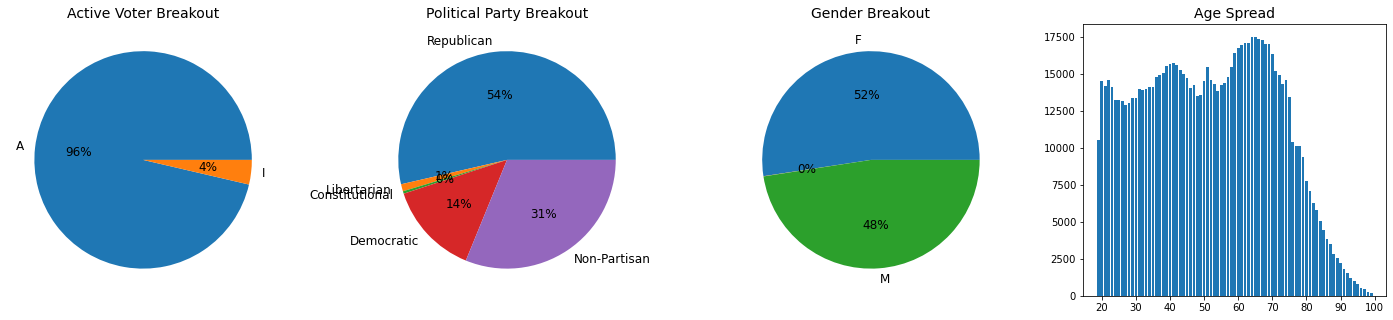

In [7]:
# Here we've built quick grouped tables to plot charts based on Voter Status, Party, Gender, and Age.

qi0 = ID_Voters.groupBy('status').agg(F.count('voter_id').alias('count')).toPandas()
qi1 = ID_Voters.groupBy('party').agg(F.count('voter_id').alias('count')).toPandas()
qi2 = ID_Voters.groupBy('gender').agg(F.count('voter_id').alias('count')).toPandas()
qi3 = ID_Voters.groupBy('age').agg(F.count('voter_id').alias('count')).toPandas()

fig, axs = plt.subplots(1,4, figsize=(25,5))

axs[0].pie(data = qi0, labels = 'status', x = 'count', autopct='%.0f%%', textprops={'fontsize': 12})
axs[0].set_title('Active Voter Breakout', fontsize=14)

axs[1].pie(data = qi1, labels = 'party', x = 'count', autopct='%.0f%%', textprops={'fontsize': 12})
axs[1].set_title('Political Party Breakout', fontsize=14)

axs[2].pie(data = qi2, labels = 'gender', x = 'count', autopct='%.0f%%', textprops={'fontsize': 12})
axs[2].set_title('Gender Breakout', fontsize=14)

axs[3].bar(data = qi3, x = 'age', height = 'count')
axs[3].set_title('Age Spread', fontsize=14)

#### Duplicate & Null Cleanup <a class="anchor" id="duplicateCheck"></a>

Now that we know a little bit about the voter profile, we want to clean up areas we believe will result in better analysis. Below, we check for duplicate and null values. In certain cases we fill null values, but in other cases we simply drop the few that are missing. We explain this process below.

In [8]:
# First, we iterate on the dataset to spot duplicate records

if ID_Voters.count() == ID_Voters.dropDuplicates().count():
    print('Data has no duplicates')
else:
    print('Warning: Data may have duplicates')

Data has no duplicates


In [9]:
# Now we will check for null values. Again, we iterate on the dataset to identify nulls, count the null values and percent null

null_check = ID_Voters.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in ID_Voters.columns]).toPandas().T

null_check.rename(columns={0:'null_count'}, inplace=True)
null_check['null_percent'] = (null_check.null_count / ID_Voters.count())*100
null_check[null_check['null_count'] > 0]

,null_count,null_percent
res_zip,301,0.031788
gender,307,0.032421
age,296,0.031260
ethnic,85793,9.060331
ethnic_group,85793,9.060331
religion,598742,63.231275
computer_owner,331483,35.006886
donates,270431,28.559374
edu_level,418203,44.165114
hh_income_grouping,37026,3.910200


**Drop null values from these columns**

In [10]:
ID_Voters = ID_Voters.dropna(subset=('res_zip', # dropping 301 records
                                     'gender', # dropping 307 records
                                     'age', # dropping 296 records
                                     'owner_renter' # while there are a lot of null values, this column is critical for us and we cannot fill null values
                                    ))

**Drop specific values from certain columns**

In [11]:
# Drop Libertarian and Constitutional Parties. From the Typical Voter Profile Analysis above, we can see this represents a very small minority.
ID_Voters = ID_Voters.where((ID_Voters.party != 'Libertarian') & (ID_Voters.party != 'Constitutional'))

# Drop Inactive Voters. From the Typical Voter Profile Analysis above, we can see this represents a very small minority (5%).
ID_Voters = ID_Voters.where(ID_Voters.status != 'I')

**Drop entire columns from the dataset**

In [12]:
ID_Voters = ID_Voters.drop('religion', # a secondary demographic column, too many null values to fill with 'Unknown'
                           'hh_income_grouping', # pre-grouped values, not needed. We will use hh_income_amount as a continuous value
                           'ispsa_group', # pre-calculated grouping based on education and income, we will use those columns as inidividual features
                           'hh_net_worth_grouping', # pre-grouped values, not needed.
                           'unit_size', # too many null values to fill with 'Unknown', we will use property_type which is similar
                           'house_price', # entire column in null
                           'income_decile', # pre-calculated grouping based on income, we will use various income columns as an inidividual feature
                           'hh_political_contributor', # too many null values to fill with '0'
                           'voter_id', # not needed
                           'status' # no longer needed, only active voters remain
                          )

**Fill null values for specified categorical columns**

In [13]:
# Fill null values with 'Unknown' / 'U'
ID_Voters = ID_Voters.na.fill({'ethnic': 'Unknown',\
                               'ethnic_group': 'Unknown',\
                               'computer_owner' : 'U',\
                               'donates' : 'U',\
                               'edu_level' : 'Unknown',\
                               'business_owner' : 'Unknown',\
                               'investor' : 'Unknown',\
                               'horse_owner' : 'Unknown',\
                               'prem_cc_owner' : 'U',\
                               'don_conservative' : 'Unknown',\
                               'don_healthcare' : 'Unknown',\
                               'don_liberal' : 'Unknown',\
                               'don_veteran' : 'Unknown',\
                               'home_office' : 'Unknown'
                              })

**Fill null values for specified continuous columns with average value**

In [14]:
# First, we cleaned the continuous columns that are strings by removing the '$' and casting as a double
ID_Voters = ID_Voters.withColumn('hh_income_amount', F.regexp_replace('hh_income_amount', '[$,]', '').cast('double'))
ID_Voters = ID_Voters.withColumn('area_hh_income', F.regexp_replace('area_hh_income', '[$,]', '').cast('double'))
ID_Voters = ID_Voters.withColumn('area_house_value', F.regexp_replace('area_house_value', '[$,]', '').cast('double'))
ID_Voters = ID_Voters.withColumn('house_value', F.regexp_replace('house_value', '[$,]', '').cast('double'))

# Now, we collect the average values from each column
avg_inc = ID_Voters.agg({'hh_income_amount':'mean'}).collect()[0][0]
avg_ainc = ID_Voters.agg({'area_hh_income':'mean'}).collect()[0][0]
avg_ahv = ID_Voters.agg({'area_house_value':'mean'}).collect()[0][0]
avg_hv = ID_Voters.agg({'house_value':'mean'}).collect()[0][0]
avg_aedu = ID_Voters.agg({'area_edu_years':'mean'}).collect()[0][0]
avg_lat = ID_Voters.agg({'res_lat':'mean'}).collect()[0][0]
avg_lon = ID_Voters.agg({'res_lon':'mean'}).collect()[0][0]

# And finally, we fill the null values using the above averages for each column
fill_cols = {'hh_income_amount':avg_inc,
             'area_hh_income':avg_ainc,
             'area_house_value':avg_ahv,
             'house_value':avg_hv,
             'area_edu_years':avg_aedu,
             'res_lat':avg_lat,
             'res_lon':avg_lon
            }          
ID_Voters = ID_Voters.na.fill(fill_cols)

**Final Null Check & Row Count**

In [15]:
nc = [ID_Voters.where(F.col(x).isNull()).count() for x in ID_Voters.columns]

if np.sum(np.array(nc)) == 0:
    print('Data has no Null Values')
else:
    print('Warning: Data has Null Values')
    
print("The Idaho Voters DataFrame now has {} records".format(ID_Voters.count()))

Data has no Null Values
The Idaho Voters DataFrame now has 404650 records


## Leveling Out the Data: Undersampling <a class="anchor" id="undersampling"></a>

As seen before when we saw the Voter Profile, there is a clear majority party in the state of Idaho. We decided to undersample the data to better balance the data for further analysis.  

In [16]:
# First we build a table to count the number of voters per party
ID_Voters.groupby('party').count().show()

+------------+------+
|       party| count|
+------------+------+
|  Republican|222792|
|  Democratic| 55050|
|Non-Partisan|126808|
+------------+------+



In [47]:
# Now we'll create a different dataframe for each party that samples roughly a simialr size of voter records
demo = ID_Voters.where(ID_Voters.party == 'Democratic').sample(fraction=.549, seed=843)
repub = ID_Voters.where(ID_Voters.party == 'Republican').sample(fraction=.135, seed=843)
nonp = ID_Voters.where(ID_Voters.party == 'Non-Partisan').sample(fraction=.238, seed=843)

# Finally, we combine the datasets together to have one balanced dataset
ID_sample = demo.union(repub)
ID_sample = ID_sample.union(nonp)

# Here's the final output
ID_sample.groupby('party').count().show()

+------------+-----+
|       party|count|
+------------+-----+
|  Republican|30217|
|  Democratic|30283|
|Non-Partisan|30298|
+------------+-----+



## Initial Questions & Insights <a class="anchor" id="initialQuestions"></a>

As a team we discussed the data and the overall features we were going to analyze. Frequent questions that arose related to how important certain factors would be for our analysis. Here are some of those questions we will explore further:

* What's average income based on education, home ownership, and party?
* Which features are closely correlated? Does anything stick out that we wouldn't expect?
* What characteristics should we consider for further analysis?

In [18]:
# Here we create a dataframe to use with Spark SQL
ID_sample.createOrReplaceTempView("ID_sample")

#### Average Income by Political Party <a class="anchor" id="avgIncome"></a>
This graph shows average household income by Political Party. Generally, there doesn't seem to be a significant difference between the parties other than Democractic voters.

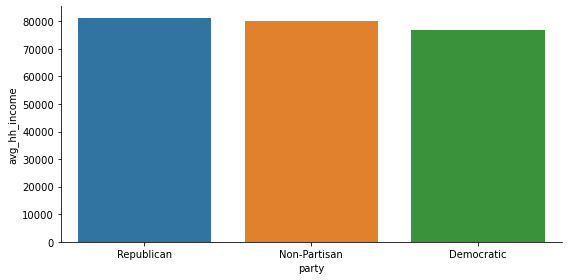

In [19]:
a = spark.sql("""
select party,
avg(hh_income_amount) avg_hh_income 
from ID_sample
group by party
order by avg_hh_income desc""")

df_a = a.toPandas()

sns.catplot(x="party", y="avg_hh_income", data=df_a , kind = 'bar', height = 4 , aspect = 2)

plt.show()

#### Education Level Count <a class="anchor" id="eduLevel"></a>
This graph shows the count of voter education level by political party. The spread again, is fairly consistent across political parties. There does seem to be a higher amount of Some College - Likley and Grad Degree - Extremely Likely for democratics, propotionaly to the total count.

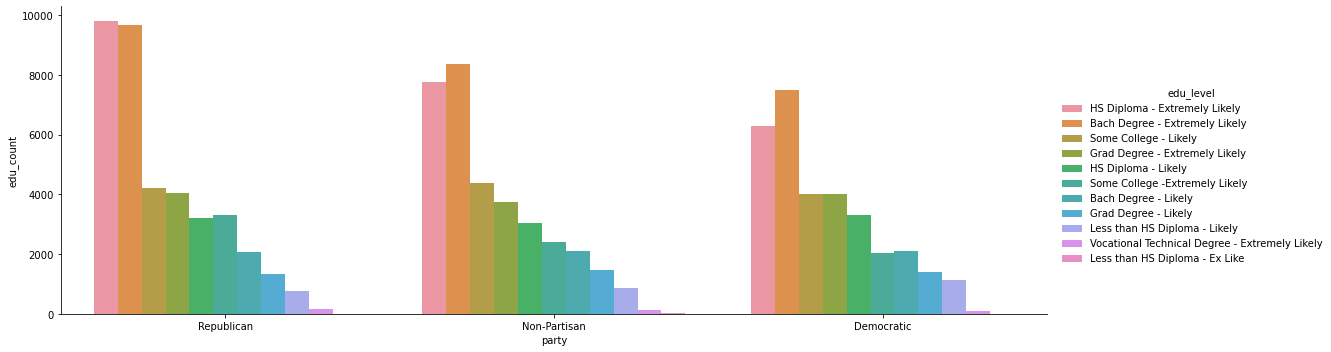

In [20]:
b = spark.sql("""
select party, edu_level, count(edu_level) edu_count 
from ID_sample
where edu_level != 'Unknown'
group by party, edu_level
order by edu_count desc""")

df_b = b.toPandas()

g = sns.catplot(x='party', y='edu_count', kind='bar', hue = 'edu_level', data=df_b, height = 5, aspect = 3)

plt.show()

#### Homeowner or Renter Count <a class="anchor" id="ownerRenter"></a>
This graph shows the count of homeonwers vs renters by political party. The biggest point to call out here is that it seems like there are far more republican homeowners than there are renters, while for democrats, it's nearly equally split.

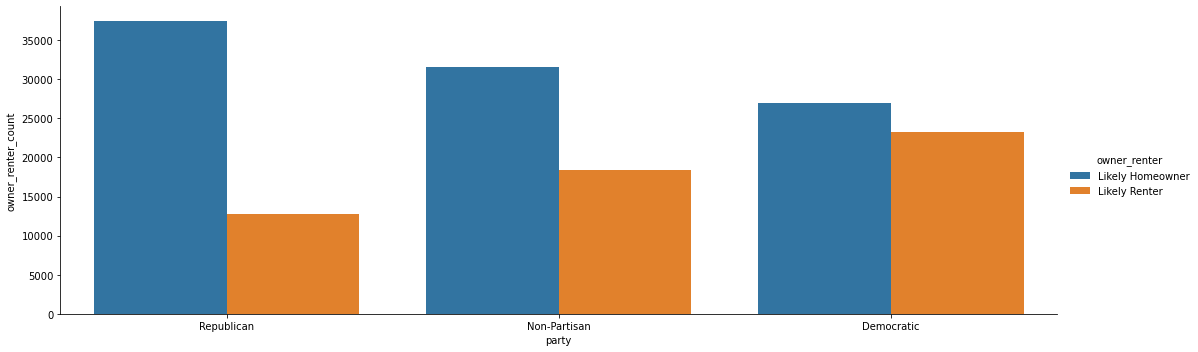

In [21]:
c = spark.sql("""
select party, owner_renter, 
count(owner_renter) owner_renter_count
from ID_sample
where owner_renter != 'Unknown'
group by party, owner_renter
order by owner_renter_count desc""")

df_c = c.toPandas()

g = sns.catplot(x='party', y='owner_renter_count', kind = 'bar', hue = 'owner_renter', data=df_c, height = 5, aspect = 3)

plt.show()

## Aggregate Analysis <a class="anchor" id="aggregateAnalysis"></a>
We want to analyze Aggregate Information by considering how income, education, and home value intersect. The goal is to identify if selected factors in aggregate vary between political parties.

In [22]:
# First, we'll create a new dataframe for Aggregate Analysis
agg_df = ID_sample[['res_city',
                    'area_hh_income',
                    'area_edu_years',
                    'house_value',
                    'hh_income_amount',
                    'hh_count',
                    'party'
                   ]]

# Then, we will create a new dataframe while calculating added ratios as new columns to analyze
agg_df1 = agg_df.selectExpr('res_city',\
                            'area_hh_income / area_edu_years as MedianIncomeEducationRatio',\
                            'house_value / hh_income_amount as HomeValueIncomeRatio',\
                            'hh_income_amount / hh_count as AverageIndividualIncome',\
                            'party'
                           )

#### Income Education Ratio

This ratio is based on the "area" household income, and "area" years of education. While we hoped this would provide some level of insight, "area" is loosely defined, and voters of different political parties live in similar areas. Thus, very little is to be found here.

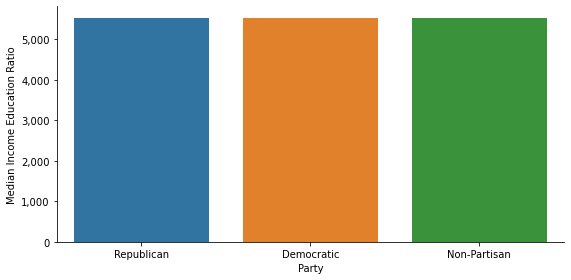

In [23]:
# Build an aggregate table
MER = agg_df1.groupBy('party')\
             .agg(F.count('MedianIncomeEducationRatio').alias('count'),\
                  F.max('MedianIncomeEducationRatio').alias('max_MER'),\
                  F.min('MedianIncomeEducationRatio').alias('min_MER'),\
                  (F.max('MedianIncomeEducationRatio') - F.min('MedianIncomeEducationRatio')).alias('spread_MER'),\
                  F.avg('MedianIncomeEducationRatio').alias('avg_MER')
                 )

# Create a Pandas DF to chart results
MER_pdf = MER.toPandas()

# Average MER Plot
MERC = sns.catplot(data = MER_pdf, x = 'party', y = 'avg_MER', kind = 'bar', height = 4, aspect = 2, legend=True)
MERC.set_axis_labels('Party', 'Median Income Education Ratio')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

#### Home Value Income Ratio

This ratio is based on the home's value and household income. A higher ratio means the voter lives in or purchased a house with a greater value than what they take home as income. Below, you see Democratic voters have a higher ratio than other parties. This indicates home value and income are potential differentiators for party affiliation.

Additionally, you can see the spread differs quite a bit between political party voters as well. It appears in this case Republican voters have the largest spread between the Home Value Income Ratio.

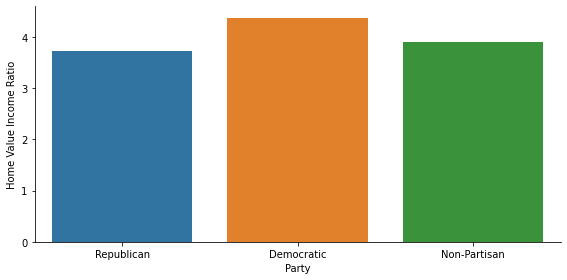

In [24]:
# Build an aggregate table
HVI = agg_df1.groupBy('party')\
             .agg(F.count('HomeValueIncomeRatio').alias('count'),\
                  F.max('HomeValueIncomeRatio').alias('max_HVI'),\
                  F.min('HomeValueIncomeRatio').alias('min_HVI'),\
                  (F.max('HomeValueIncomeRatio') - F.min('HomeValueIncomeRatio')).alias('spread_HVI'),\
                  F.avg('HomeValueIncomeRatio').alias('avg_HVI')
                 )

# Create a Pandas DF to chart results
HVI_pdf = HVI.toPandas()

# Average HVI Plot
HVIC = sns.catplot(data = HVI_pdf, x = 'party', y = 'avg_HVI', kind = 'bar', height = 4, aspect = 2, legend=True)
HVIC.set_axis_labels('Party', 'Home Value Income Ratio')

plt.show()

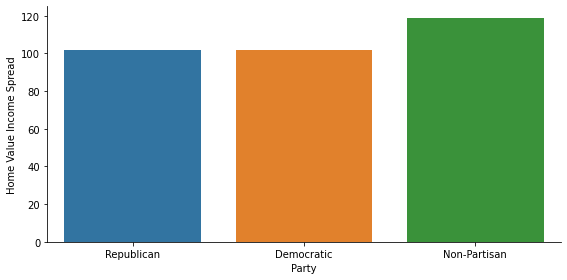

In [25]:
# Spread HVI Plot
HVIC = sns.catplot(data = HVI_pdf, x = 'party', y = 'spread_HVI', kind = 'bar', height = 4, aspect = 2, legend=True)
HVIC.set_axis_labels('Party', 'Home Value Income Spread')

plt.show()

#### Individual Income

Individual Income takes household income and headcount to see what average income is per person. The largest difference seems to lie with Replican Voters. This means there is less income per person in the household for Republican voters than for others.

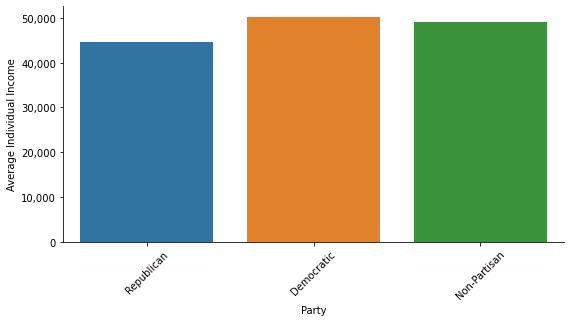

In [26]:
# Build an aggregate table
AII = agg_df1.groupBy('party')\
             .agg(F.count('AverageIndividualIncome').alias('count_AII'),\
                  F.max('AverageIndividualIncome').alias('max_AII'),\
                  F.min('AverageIndividualIncome').alias('min_AII'),\
                  (F.max('AverageIndividualIncome') -  F.min('AverageIndividualIncome')).alias('spread_AII'),\
                  F.avg('AverageIndividualIncome').alias('avg_AII')
                 )

# Create a Pandas DF to chart results
AII_pdf = AII.toPandas()

# Average AII Plot
AIIC = sns.catplot(data = AII_pdf, x = 'party', y = 'avg_AII', kind = 'bar', height = 4, aspect = 2, legend=True)
AIIC.set_axis_labels('Party', 'Average Individual Income')
plt.xticks(rotation=45)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

#### More on Income and Home Value

Before we looked at area income and area home value. This view is is more concrete on looking at each home's income and each home's value. While household income looks to be more a unique value, home value seems to follow a similar pattern as area home value where there may be some pre-calculated values to determine home value which is why we see "stripes" in the scatterplot below.

<AxesSubplot:xlabel='house_value', ylabel='hh_income_amount'>

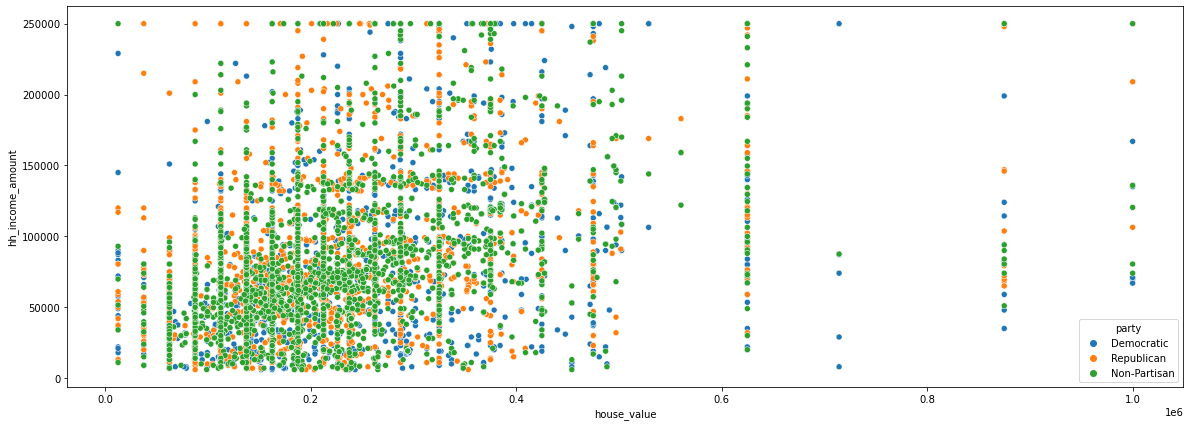

In [27]:
# Here, we create a dataframe with just a few columns for analysis to increase performance of the scatter plot
scatter_df = ID_sample.select('house_value',
                              'hh_income_amount',
                              'party')

# We only want a smaller sample of our larger sample of 150k records.
scatter_df_sample = scatter_df.sample(withReplacement = False, fraction = 0.05, seed = 843)

# Finally, we plot the data to see if there are any standouts to investigate further
scatter_df_sample = scatter_df_sample.toPandas()
plt.figure(figsize=(20, 7))
sns.scatterplot(data = scatter_df_sample, x = 'house_value', y = 'hh_income_amount', hue = 'party')

## Feature Engieering <a class="anchor" id="featureEngineering"></a>

In order to get the best read of our data in the correlation matrix (and for future ML modeling), we will prep the data first.

#### Indexing & One Hot Encoding

In [48]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# We select the categorical columns here to index below
categorical_columns= ['res_city','res_zip','hh_gender_desc','gender','ethnic','ethnic_group','county','computer_owner','donates','edu_level','property_type',
                      'business_owner','owner_renter','investor','horse_owner','prem_cc_owner','don_conservative','don_healthcare','don_liberal','don_veteran',
                      'home_office'
                     ]

# Now, using the string value witihin the categorical columns from above, we will use the String Indexer to index those columns
indexers = [
    StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
    for c in categorical_columns
]

# Here we will now encode the indexed values on all the categorical columns
encoders = [OneHotEncoder(dropLast=False,inputCol=indexer.getOutputCol(),
            outputCol="{0}_encoded".format(indexer.getOutputCol())) 
    for indexer in indexers
]

# And dinally, vectorizing the encoded values
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders],outputCol="features")

# The pipeline below will manage the above process on our cleanest Dataset, ID_sample
pipeline = Pipeline(stages=indexers + encoders+[assembler])
model = pipeline.fit(ID_sample)
transformed = model.transform(ID_sample)

In [49]:
# Now with the feature columns transformed, we want to create a column to manually index the party column to fit our problem.
# Since in this dataset Republicans are the majority party, we will set that party as 1, and all other parties as 0

ID_df = transformed.withColumn('party_binary', ID_sample['party'])
ID_df = ID_df.replace('Democratic', '0', subset='party_binary')
ID_df = ID_df.replace('Non-Partisan', '0', subset='party_binary')
ID_df = ID_df.replace('Republican', '1', subset='party_binary')
ID_df = ID_df.drop('party')

In [50]:
# From this final dataframe, we will create two other. One for Correlation Analysis, and one for Machine Learning.

# Create a dataframe for correlation analysis using the indexed columns from above
corr_df = ID_df[['res_city_indexed','res_zip_indexed','hh_gender_desc_indexed','gender_indexed','ethnic_indexed','ethnic_group_indexed','county_indexed',
                       'computer_owner_indexed','donates_indexed','edu_level_indexed','property_type_indexed','business_owner_indexed','owner_renter_indexed','investor_indexed',
                       'horse_owner_indexed','prem_cc_owner_indexed','don_conservative_indexed','don_healthcare_indexed','don_liberal_indexed','don_veteran_indexed',
                       'home_office_indexed','hh_count','age','hh_income_amount','house_value'
                      ]]

# Drop the original feature categorical columns and indexed columns from above to use the encoded columns for ML
ID_df = ID_df.drop('res_city','res_zip','hh_gender_desc','gender','ethnic','ethnic_group','county','computer_owner','donates','edu_level',
                         'property_type','business_owner','owner_renter','investor','horse_owner','prem_cc_owner','don_conservative','don_healthcare',
                         'don_liberal','don_veteran','home_office','features','res_city_indexed','res_zip_indexed','hh_gender_desc_indexed',
                         'gender_indexed','ethnic_indexed','ethnic_group_indexed','county_indexed','computer_owner_indexed','donates_indexed','edu_level_indexed',
                         'property_type_indexed','business_owner_indexed','owner_renter_indexed','investor_indexed','horse_owner_indexed','prem_cc_owner_indexed',
                         'don_conservative_indexed','don_healthcare_indexed','don_liberal_indexed','don_veteran_indexed','home_office_indexed')

## Correlation Analysis <a class="anchor" id="correlation"></a>
A heatmap is a great way for us to visualize which features are correlated. Unsurprisingly, we see some correlation between hh_income_amount and house_value, but more interestingly we see owner_renter and donates are correlated as well.

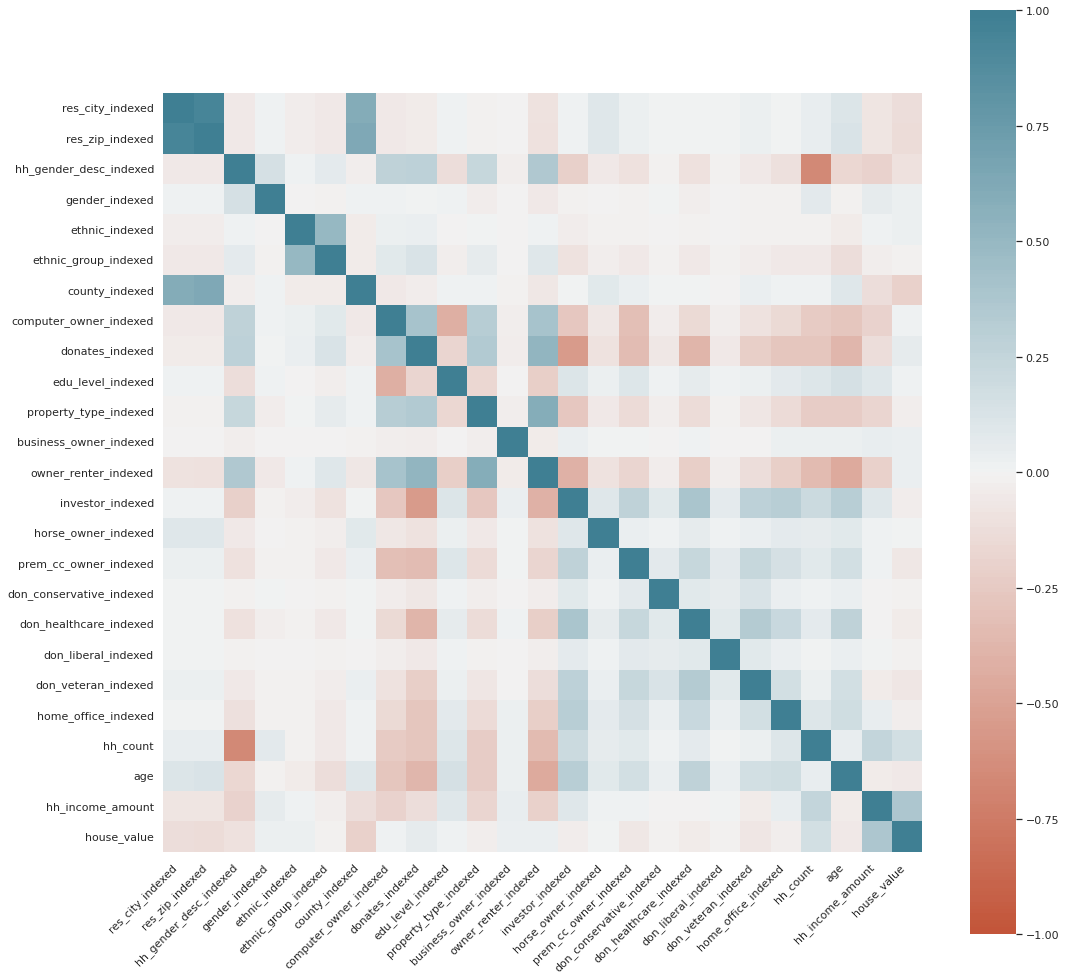

In [51]:
corr_pd = corr_df.toPandas()
corr = corr_pd.corr()

sns.set(rc = {'figure.figsize':(17,17)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Machine Learning <a class="anchor" id="machineLearning"></a>
In this section, we will explore different ML models and evaluate which one produces the best results in predicting voter party affiliation. For each model below, we will use a param grid builder to run different scenarios in the attempt to find the best model.

**Import Generic Features for ML**

In [32]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import RFormula, StringIndexer

**Build a Classification Function for Evaluation**

In [33]:
def classificationReport(prediction):
    TP = prediction.filter('prediction = 1 AND label = prediction').count()
    FN = prediction.filter('prediction = 0 AND label <> prediction').count()
    FP = prediction.filter('prediction = 1 AND label <> prediction').count()
    TN = prediction.filter('prediction = 0 AND label = prediction').count()
    print()
    print('CONFUSION MATRIX:')
    print('TP:{}   FN:{}'.format(TP,FN))
    print('FP:{}   TN:{}'.format(FP,TN))
    precision = TP/(TP+FP)
    recall = TP / (TP+FN)
    f1 = (2.0*precision*recall)/(precision+recall)
    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    print()
    print('Precision:{}'.format(precision))
    print('Recall   :{}'.format(recall))
    print('F1-score :{}'.format(f1))
    print('Accuracy :{}'.format(Accuracy))

#### Logistic Regression <a class="anchor" id="lr"></a>

In [52]:
from pyspark.ml.classification import LogisticRegression

# Split data to train the model and test the model
train, test = ID_df.randomSplit([0.8, 0.2], seed = 843)

# Define RFormula for the first stage of the pipeline below
rForm = RFormula()

# Instantiate the Logistic Regression
lr = LogisticRegression()

# Set up the stages
stages = [rForm, lr]

# And add the stages to the pipeline
pipeline = Pipeline().setStages(stages)

# Build the hyperparameter grid
params = ParamGridBuilder()\
  .addGrid(rForm.formula,[
    "party_binary ~ .",
    "party_binary ~ . + hh_income_amount:house_value",
    "party_binary ~ . + hh_income_amount:house_value + owner_renter_indexed_encoded:donates_indexed_encoded"
    ])\
  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])\
  .addGrid(lr.regParam, [0.1, 2.0])\
  .build()

# Evalute the model usinf areaUnderROC
evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

# Define the Train Validation Split to be used for hypyerparameter tuning
tvs = TrainValidationSplit()\
  .setTrainRatio(0.75)\
  .setEstimatorParamMaps(params)\
  .setEstimator(pipeline)\
  .setEvaluator(evaluator)

# Fit the model using the training dataset
tvsFitted = tvs.fit(train)

# Evaluate the results
print('Test AUC:', evaluator.evaluate(tvsFitted.transform(test)))
prediction = tvsFitted.transform(test)
classificationReport(prediction)

22/05/01 22:38:41 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/05/01 22:38:42 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


Test AUC: 0.7262035779347302



CONFUSION MATRIX:
TP:1572   FN:4545
FP:935   TN:11052

Precision:0.6270442760271241
Recall   :0.25698871996076506
F1-score :0.3645640074211502
Accuracy :0.6973044631020769


#### Random Forest <a class="anchor" id="rf"></a>

In [53]:
from pyspark.ml.classification import RandomForestClassifier

# Split data to train the model and test the model
train, test = ID_df.randomSplit([0.8, 0.2], seed = 843)

# Define RFormula for the first stage of the pipeline below
rForm = RFormula()

# Instantiate the Logistic Regression
rf = RandomForestClassifier()

# Set up the stages
stages = [rForm, rf]

# And add the stages to the pipeline
pipeline = Pipeline().setStages(stages)

# Build the hyperparameter grid
params = ParamGridBuilder()\
  .addGrid(rForm.formula,[
    "party_binary ~ .",
    "party_binary ~ . + hh_income_amount:house_value",
    "party_binary ~ . + hh_income_amount:house_value + owner_renter_indexed_encoded:donates_indexed_encoded"
    ])\
  .addGrid(rf.numTrees, [30,50])\
  .build()

# Evalute the model usinf areaUnderROC
evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

# Define the Train Validation Split to be used for hypyerparameter tuning
tvs = TrainValidationSplit()\
  .setTrainRatio(0.75)\
  .setEstimatorParamMaps(params)\
  .setEstimator(pipeline)\
  .setEvaluator(evaluator)

# Fit the model using the training dataset
tvsFitted = tvs.fit(train)

# Evaluate the results
print('Test AUC:', evaluator.evaluate(tvsFitted.transform(test)))
prediction = tvsFitted.transform(test)
classificationReport(prediction)

22/05/01 22:47:37 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1022.4 KiB
22/05/01 22:47:46 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1001.9 KiB
22/05/01 22:47:47 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1128.2 KiB
22/05/01 22:47:50 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1031.4 KiB
22/05/01 22:47:56 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1028.3 KiB
22/05/01 22:48:05 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1006.9 KiB
22/05/01 22:48:06 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1134.8 KiB
22/05/01 22:48:08 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1072.9 KiB
22/05/01 22:48:15 WARN org.apache.spark.scheduler.DAGScheduler: Broadcas

Test AUC: 0.6886657387637217



CONFUSION MATRIX:
TP:43   FN:6074
FP:19   TN:11968

Precision:0.6935483870967742
Recall   :0.0070295896681379765
F1-score :0.013918109726492963
Accuracy :0.66344454264251


#### Decision Tree <a class="anchor" id="dt"></a>

In [54]:
from pyspark.ml.classification import DecisionTreeClassifier

# Split data to train the model and test the model
train, test = ID_df.randomSplit([0.8, 0.2], seed = 843)

# Define RFormula for the first stage of the pipeline below
rForm = RFormula()

# Instantiate the Logistic Regression
dt = DecisionTreeClassifier()

# Set up the stages
stages = [rForm, dt]

# And add the stages to the pipeline
pipeline = Pipeline().setStages(stages)

# Build the hyperparameter grid
params = ParamGridBuilder()\
  .addGrid(rForm.formula,[
    "party_binary ~ .",
    "party_binary ~ . + hh_income_amount:house_value",
    "party_binary ~ . + hh_income_amount:house_value + owner_renter_indexed_encoded:donates_indexed_encoded"
    ])\
  .addGrid(dt.maxDepth, [3, 5, 10])\
  .addGrid(dt.minInstancesPerNode, [1, 4, 6, 8])\
  .build()

# Evalute the model usinf areaUnderROC
evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

# Define the Train Validation Split to be used for hypyerparameter tuning
tvs = TrainValidationSplit()\
  .setTrainRatio(0.75)\
  .setEstimatorParamMaps(params)\
  .setEstimator(pipeline)\
  .setEvaluator(evaluator)

# Fit the model using the training dataset
tvsFitted = tvs.fit(train)

# Evaluate the results
print('Test AUC:', evaluator.evaluate(tvsFitted.transform(test)))
prediction = tvsFitted.transform(test)
classificationReport(prediction)

Test AUC: 0.6274247376513918



CONFUSION MATRIX:
TP:1057   FN:5060
FP:672   TN:11315

Precision:0.611336032388664
Recall   :0.17279712277260095
F1-score :0.26943665562069846
Accuracy :0.6833848873177198


#### Gradient Boosted Tree <a class="anchor" id="gbt"></a>

In [55]:
from pyspark.ml.classification import GBTClassifier

# Split data to train the model and test the model
train, test = ID_df.randomSplit([0.8, 0.2], seed = 843)

# Define RFormula for the first stage of the pipeline below
rForm = RFormula()

# Instantiate the Logistic Regression
gbt = GBTClassifier()

# Set up the stages
stages = [rForm, gbt]

# And add the stages to the pipeline
pipeline = Pipeline().setStages(stages)

# Build the hyperparameter grid
params = ParamGridBuilder()\
  .addGrid(rForm.formula,[
    "party_binary ~ .",
    "party_binary ~ . + hh_income_amount:house_value",
    "party_binary ~ . + hh_income_amount:house_value + owner_renter_indexed_encoded:donates_indexed_encoded"
    ])\
  .addGrid(gbt.maxIter, [20, 30])\
  .build()

# Evalute the model usinf areaUnderROC
evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

# Define the Train Validation Split to be used for hypyerparameter tuning
tvs = TrainValidationSplit()\
  .setTrainRatio(0.75)\
  .setEstimatorParamMaps(params)\
  .setEstimator(pipeline)\
  .setEvaluator(evaluator)

# Fit the model using the training dataset
tvsFitted = tvs.fit(train)

# Evaluate the results
print('Test AUC:', evaluator.evaluate(tvsFitted.transform(test)))
prediction = tvsFitted.transform(test)
classificationReport(prediction)

22/05/01 22:53:21 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1000.0 KiB
22/05/01 22:53:22 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1001.1 KiB
22/05/01 22:53:22 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1003.3 KiB
22/05/01 22:53:22 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1005.8 KiB
22/05/01 22:53:23 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1006.4 KiB
22/05/01 22:53:23 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1007.1 KiB
22/05/01 22:53:23 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1008.2 KiB
22/05/01 22:53:24 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1010.6 KiB
22/05/01 22:53:54 WARN org.apache.spark.scheduler.DAGScheduler: Broadcas

Test AUC: 0.7224729206735995



CONFUSION MATRIX:
TP:1582   FN:4535
FP:964   TN:11023

Precision:0.6213668499607227
Recall   :0.25862350825568087
F1-score :0.36523144407249225
Accuracy :0.6962549712770658


#### Final Scores <a class="anchor" id="final"></a>

In [79]:
d = {'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosted Trees'], 'AUC Score': [0.726, 0.689, 0.627, 0.722]}
auc_final = pd.DataFrame(data=d).set_index('Model')

auc_final.sort_values('AUC Score', ascending=False)

,AUC Score
Model,
Logistic Regression,0.726
Gradient Boosted Trees,0.722
Random Forest,0.689
Decision Tree,0.627


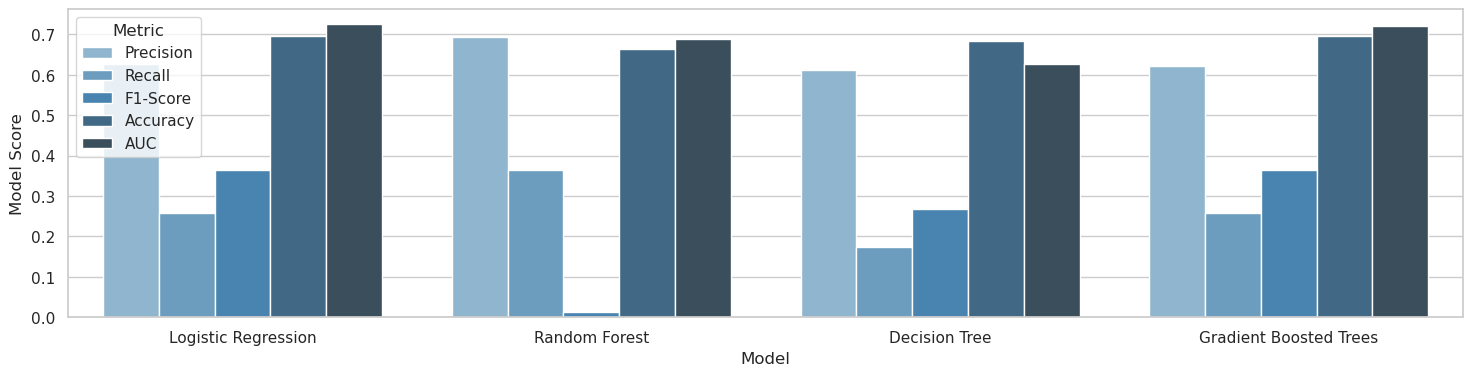

In [84]:
rsModel = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosted Trees']
rs = pd.DataFrame(index = range(4*5))
rs['Model'] = np.array(rsModel*5)
Precision = [0.6270, 0.694, 0.611, 0.621]
Recall = [0.257, 0.365, 0.173, 0.258]
F1_Score = [0.365, 0.014, 0.269, 0.365]
Accuracy = [0.697, 0.663, 0.683, 0.696]
AUC = [0.726, 0.689, 0.627, 0.722]
rs['Metric'] = np.array(['Precision']*4 + ['Recall']*4 + ['F1-Score']*4  + ['Accuracy']*4 + ['AUC']*4)
rs['Model Score'] = np.array(Precision + Recall + F1_Score  + Accuracy + AUC)
ax = sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 4))
ax = sns.barplot(data = rs, x="Model", y="Model Score", hue="Metric",palette = "Blues_d")

## Conclusion <a class="anchor" id="conclusion"></a>

The Logistic Regression model slightly beats out the Gradient Boosted Trees by 0.004. GBT uses a lot of machine power to run, and after several iterations hypertuning the parameters for both models, the LR model continued to slightly beat out the GBT model.

We started our exploration to better understand the data, and now we have a model we feel confident will produce repeatable results when assessing new voters. To test this out, we ran our best model against the Nevada Voter File, which is a swing state. See results below.

#### Nevada
The largest difference between Nevada and Idaho is the breakout of Political Parties. Since the split was fairly even, we made the "majority" party the Non-Partisan party.
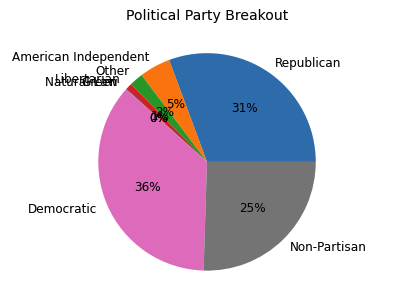

When running the cleansed Nevada Voter File (as we did with Idaho) on the Logistic Regression model (our best model), we saw a large decrease in AUC. This is likely due to the similarities in voter profiles in a swing state.
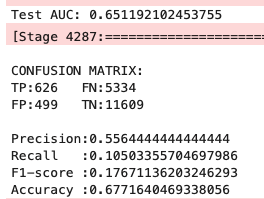

#### Limitation & Challenges
* If we had a larger cluster with more computational power, we wouldn't need to undersample our data as significantly as we did. Additional, we wished we could use a much larger cluster to combine multiple state's files into one dataset to better analyze our selected states at once.
* We wanted to add many different parameters to the grid, however we ran into compute issues and had to run them individually to see if we were "headed on the right track". In the future, we may choose a smaller sample on our big cluster.
* We originally wanted to use mutlinomial classification, but we were not able to run a model successfully. We attempted to use the family method with the logistic regression and a Multiclass Classification as our evalutor, but the model would not run, we suspect due to the cluster size.